In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data_path = '/content/wine.csv'
data = pd.read_csv(data_path)

In [3]:
# Step 1: Exploratory Data Analysis (EDA)
print("Dataset Head:\n", data.head())
print("Dataset Description:\n", data.describe())

Dataset Head:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
Dataset Description:
              Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.

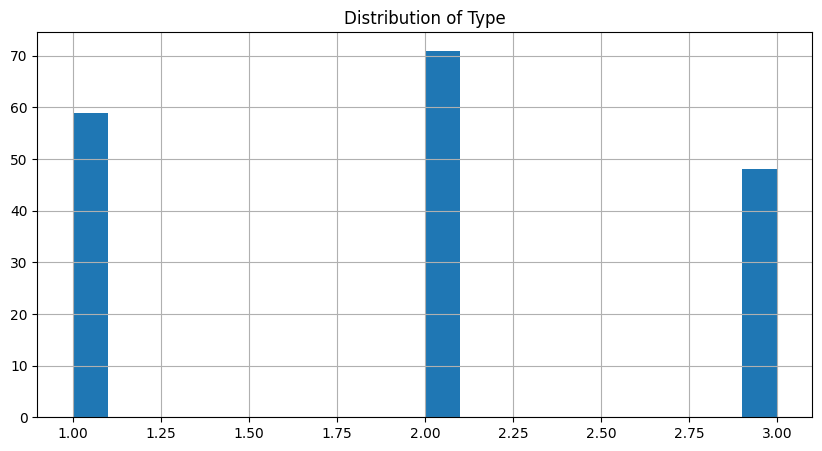

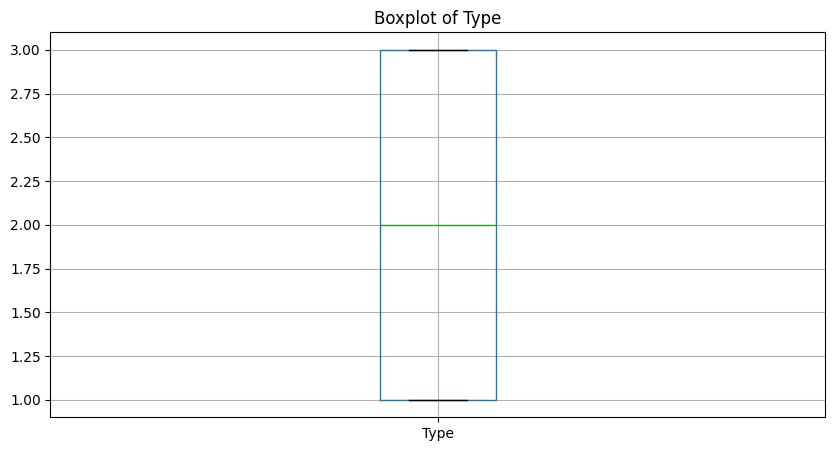

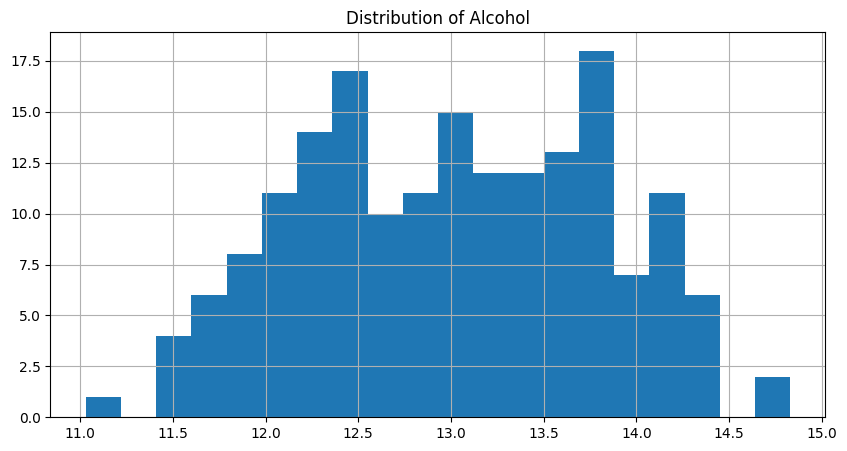

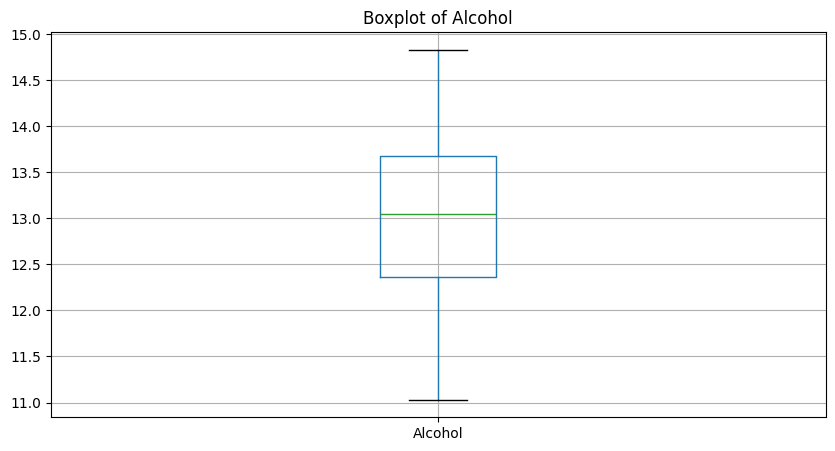

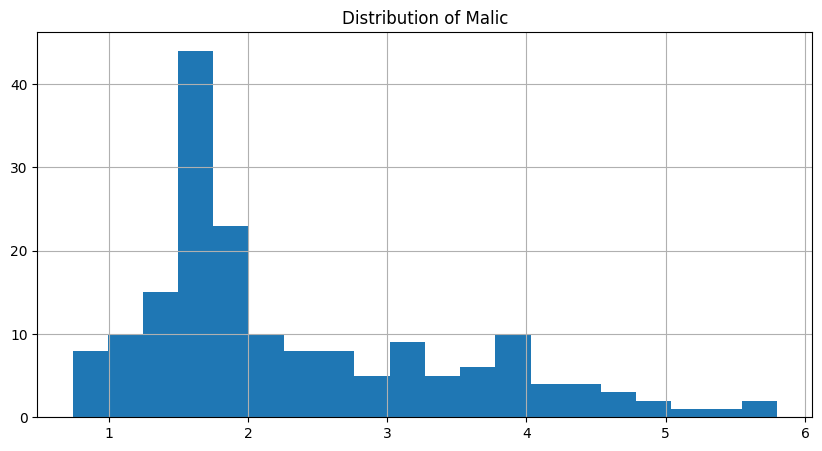

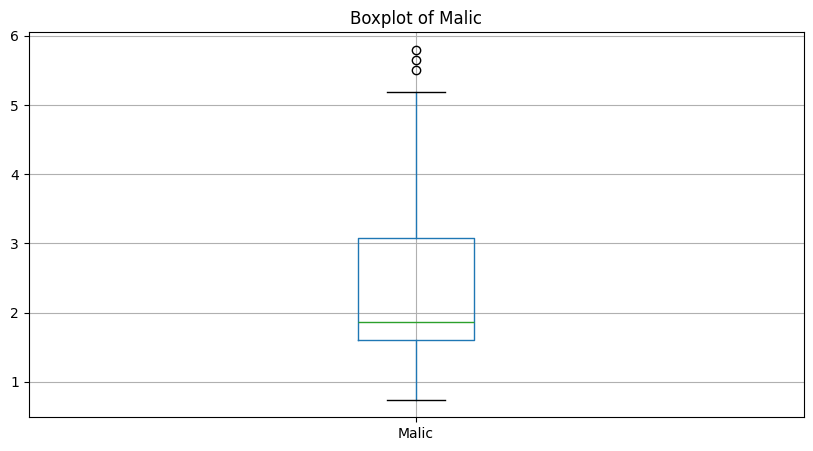

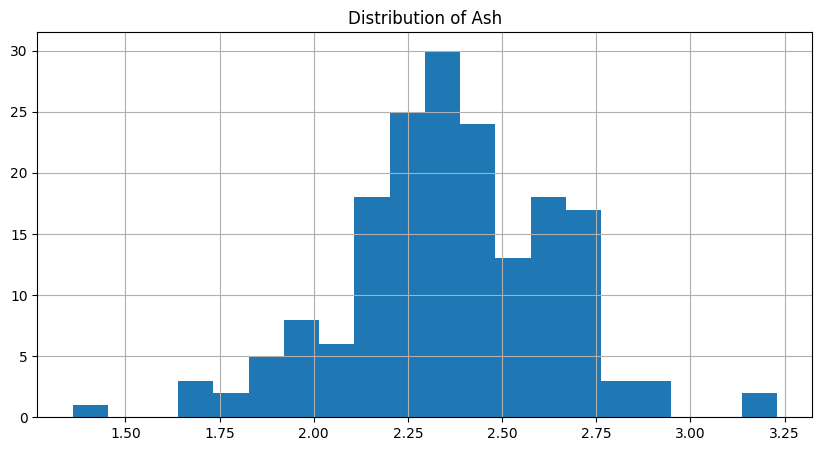

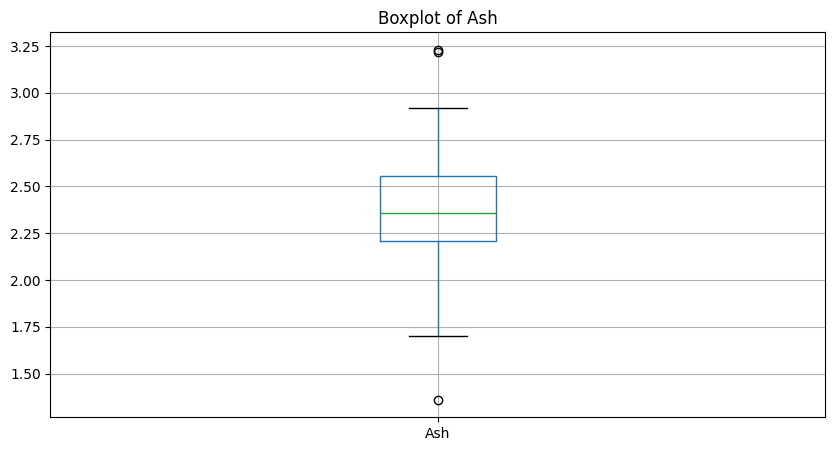

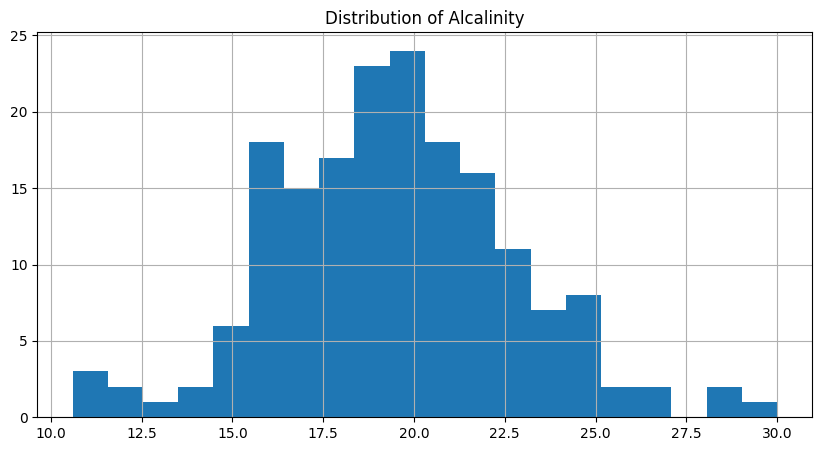

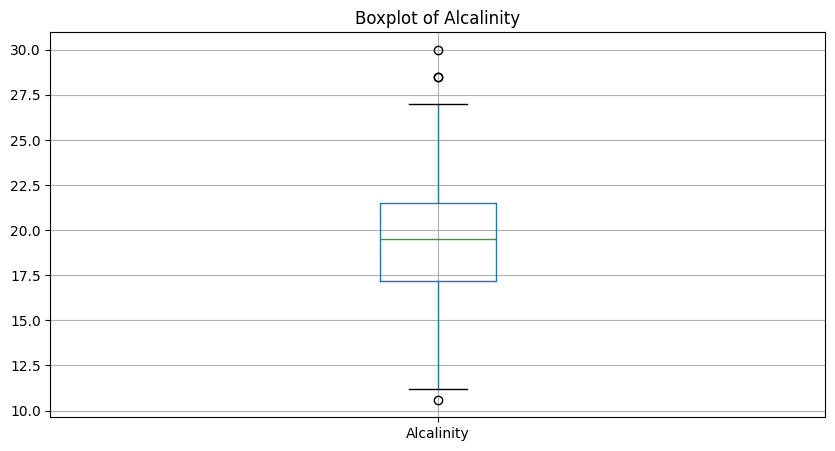

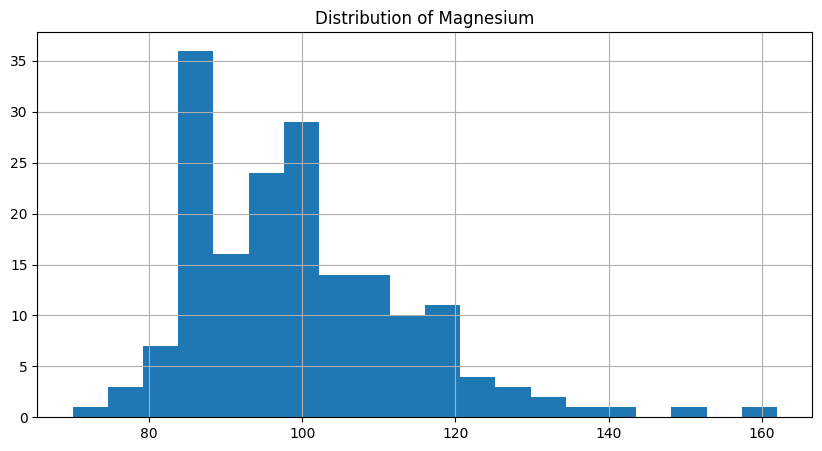

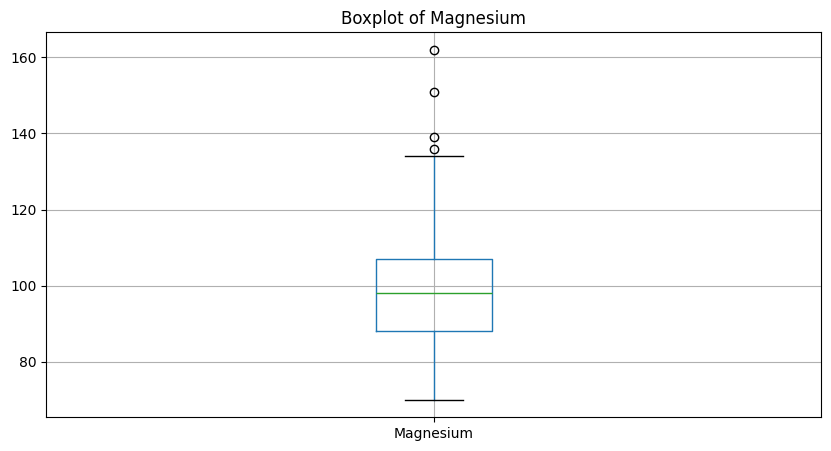

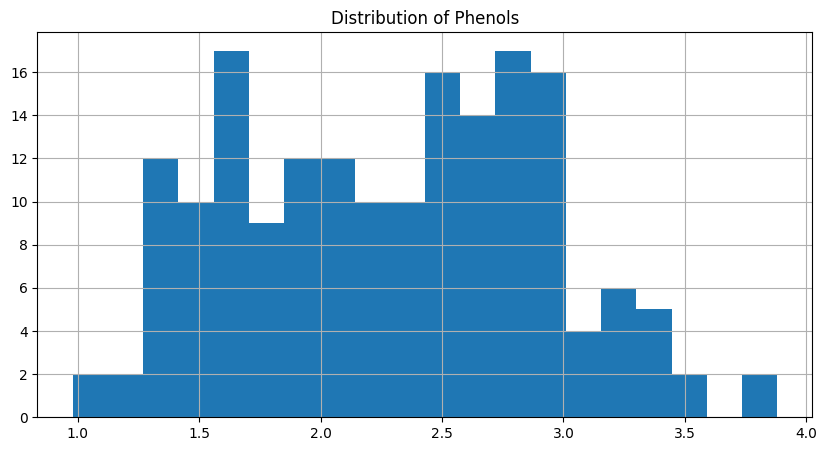

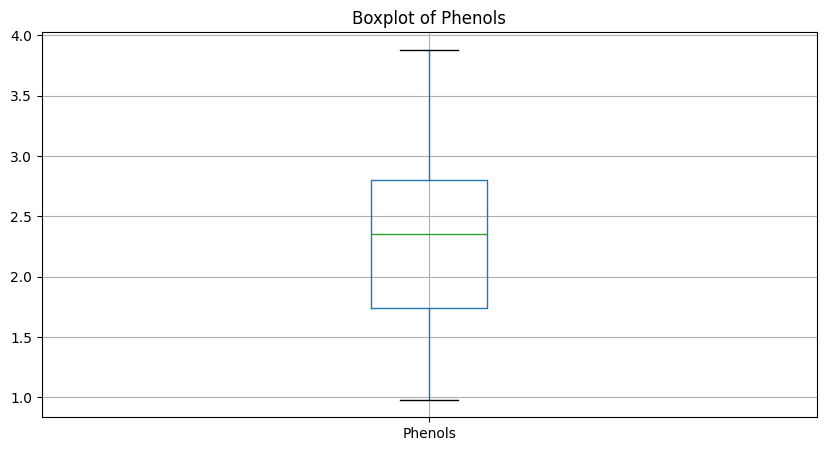

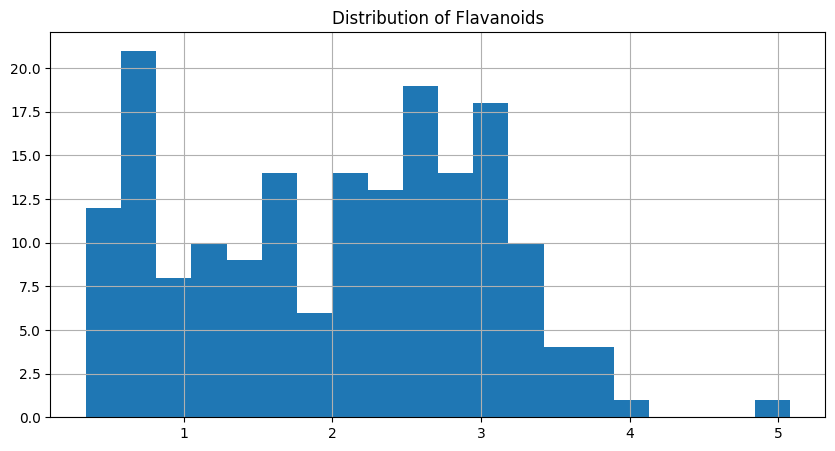

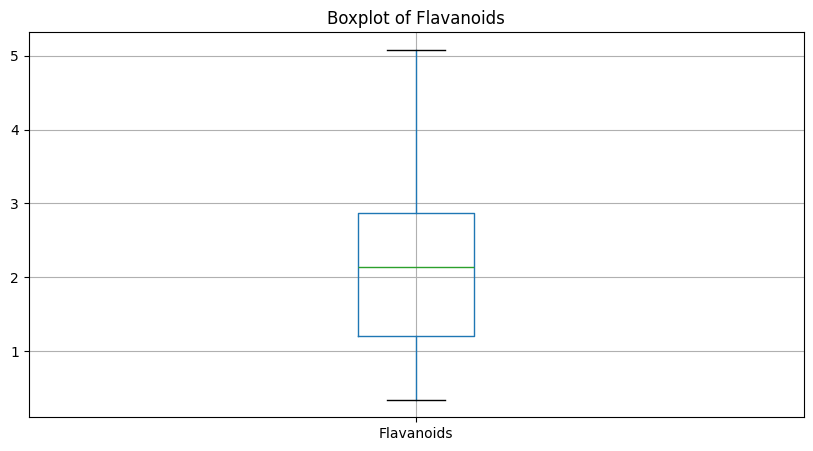

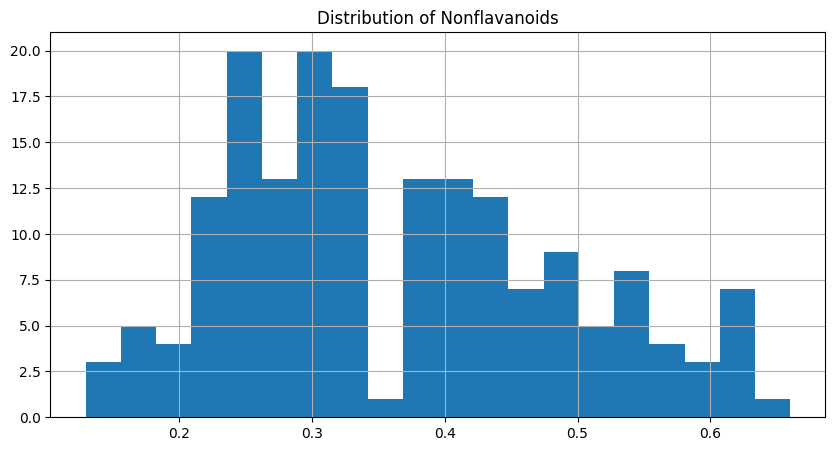

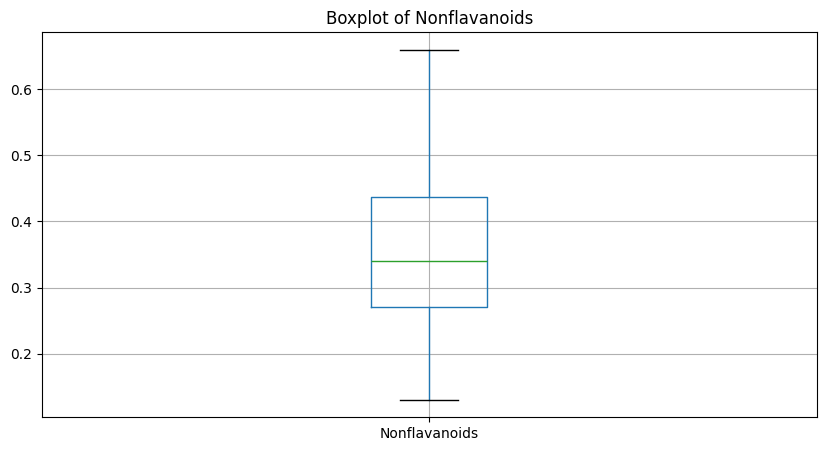

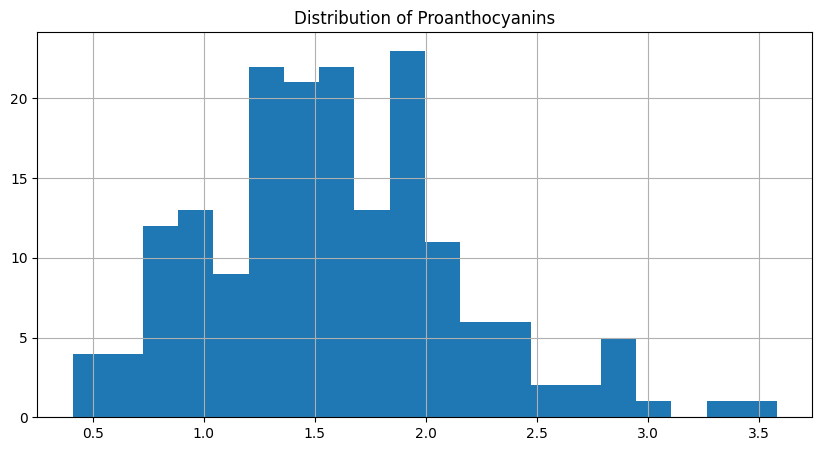

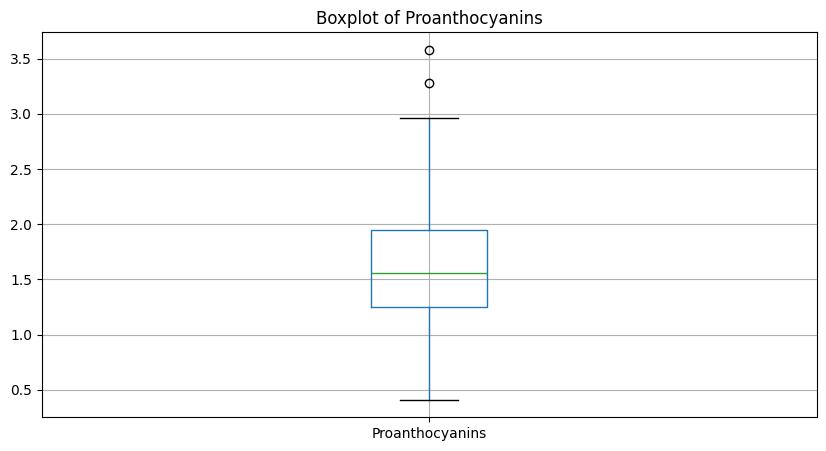

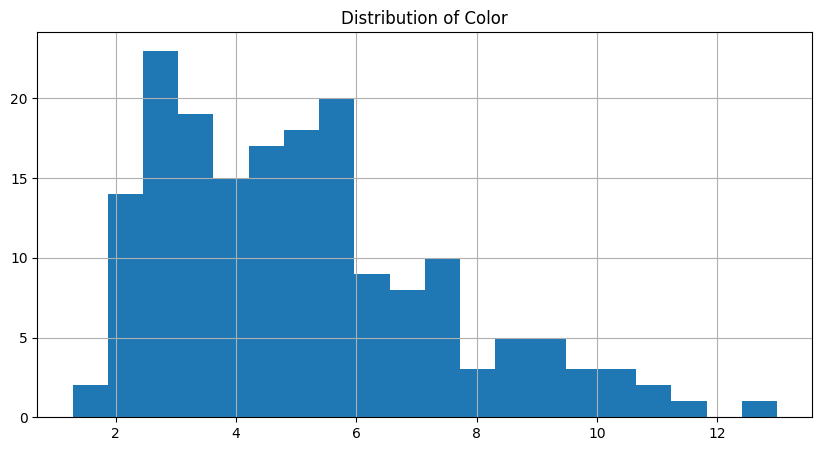

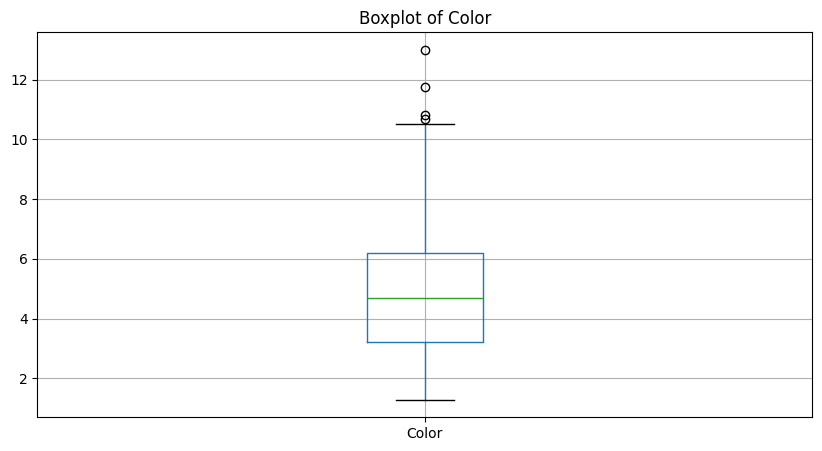

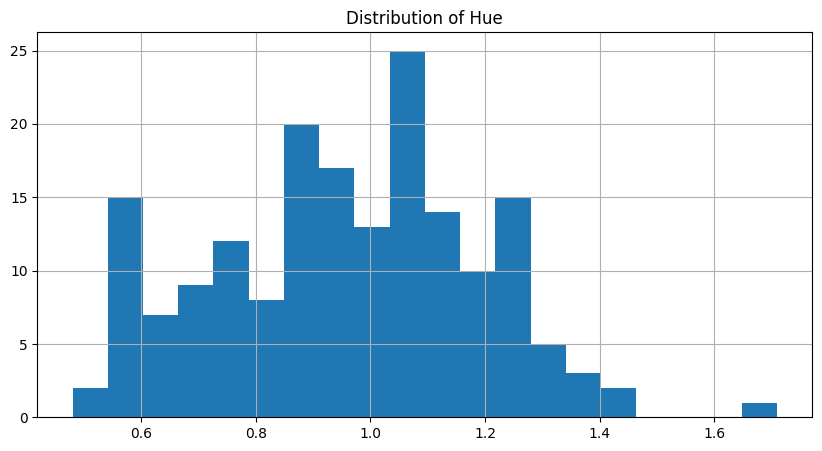

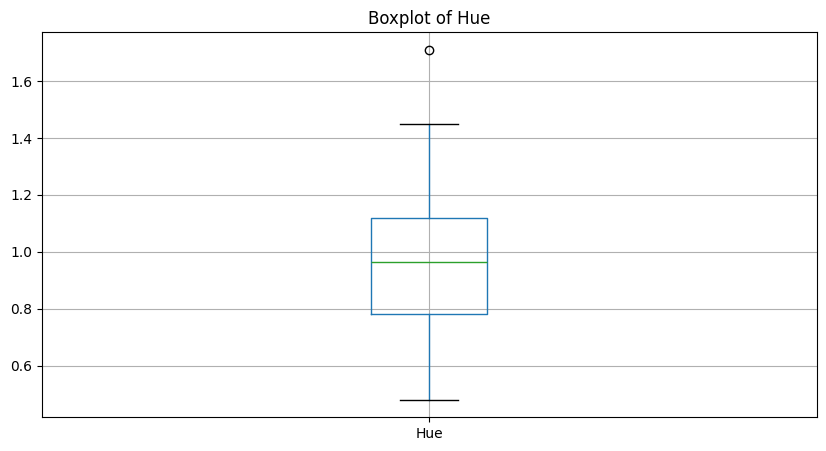

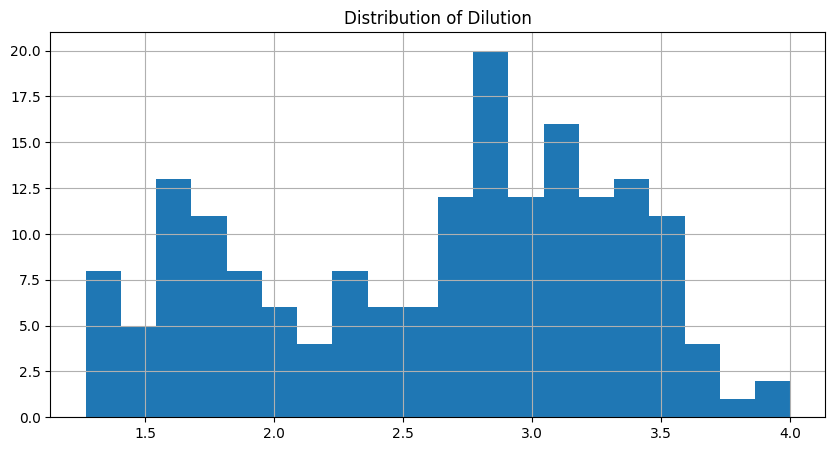

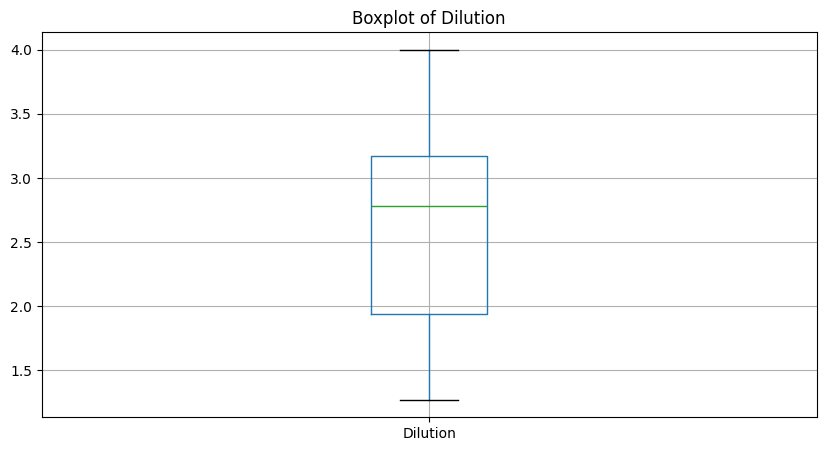

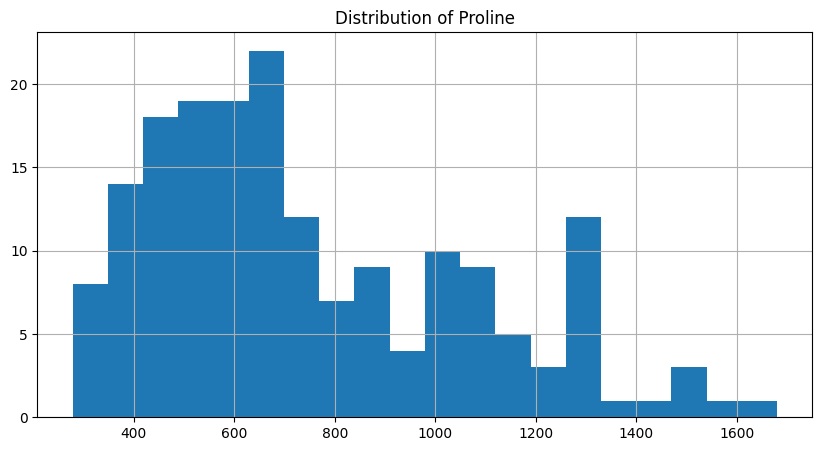

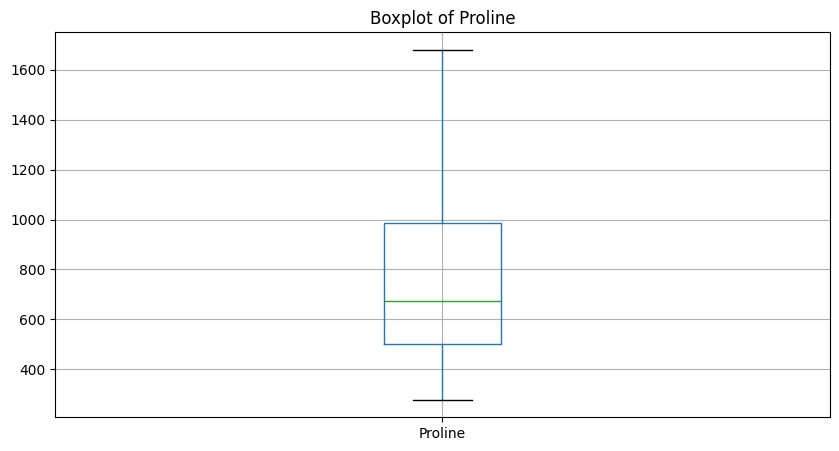

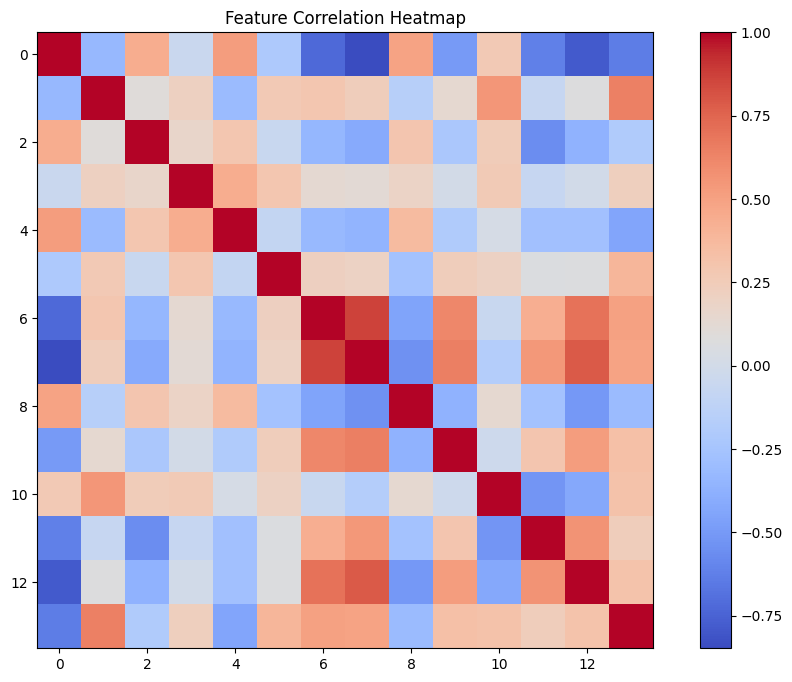

In [4]:
# Histograms and Boxplots for feature distribution
for column in data.columns:
    plt.figure(figsize=(10, 5))
    data[column].hist(bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()
    plt.figure(figsize=(10, 5))
    data.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Feature Correlation Heatmap')
plt.show()

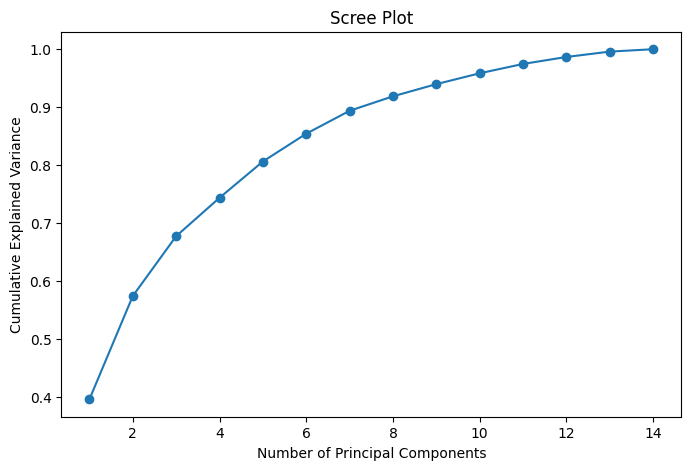

In [5]:
# Step 2: Data Preprocessing
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Dimensionality Reduction with PCA
pca = PCA()
pca.fit(data_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [6]:
# Choose optimal number of components (e.g., 95% variance explained)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal Number of Components: {n_components}")
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

Optimal Number of Components: 10


In [7]:
# Step 4: Clustering with Original Data
kmeans_original = KMeans(n_clusters=3, random_state=42)
original_labels = kmeans_original.fit_predict(data_scaled)
print("Silhouette Score (Original Data):", silhouette_score(data_scaled, original_labels))
print("Davies-Bouldin Index (Original Data):", davies_bouldin_score(data_scaled, original_labels))

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [8]:
# Step 5: Clustering with PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(data_pca)
print("Silhouette Score (PCA Data):", silhouette_score(data_pca, pca_labels))
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_score(data_pca, pca_labels))

Silhouette Score (PCA Data): 0.32292055407233017
Davies-Bouldin Index (PCA Data): 1.2578453408449173


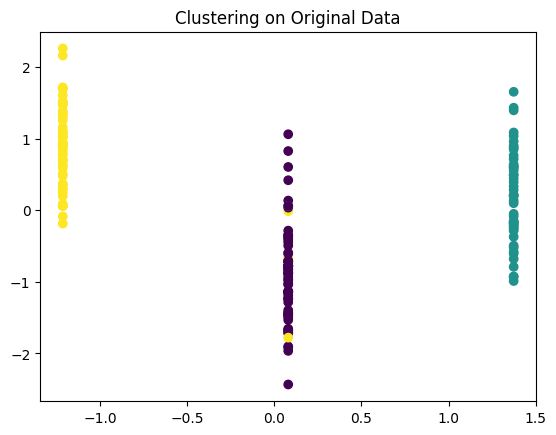

In [9]:
# Step 6: Visualization
# Original Data Clustering
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=original_labels, cmap='viridis')
plt.title('Clustering on Original Data')
plt.show()

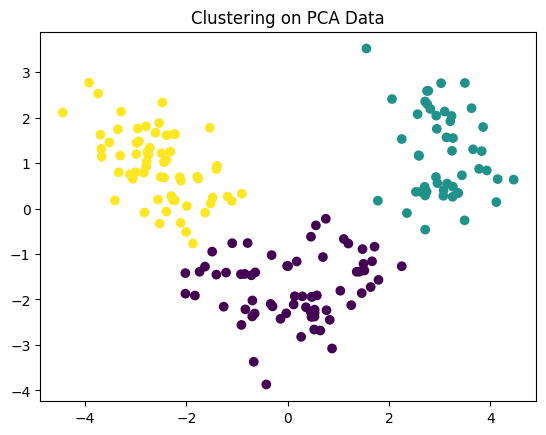

In [10]:
# PCA Data Clustering
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=pca_labels, cmap='viridis')
plt.title('Clustering on PCA Data')
plt.show()


In [11]:
# Step 7: Comparison and Analysis
print("Comparison of Clustering Performance:")
print("- Silhouette Score improved with PCA" if silhouette_score(data_pca, pca_labels) > silhouette_score(data_scaled, original_labels) else "- Silhouette Score decreased with PCA")
print("- Davies-Bouldin Index improved with PCA" if davies_bouldin_score(data_pca, pca_labels) < davies_bouldin_score(data_scaled, original_labels) else "- Davies-Bouldin Index decreased with PCA")


Comparison of Clustering Performance:
- Silhouette Score improved with PCA
- Davies-Bouldin Index improved with PCA
